# Mini Project: Titanic Survival Analysis

In [1]:
#Import the important library's

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the Dataset

df = pd.read_csv("c:/users/sakshi yadav/Downloads/tested.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
#Understand the Dataset Structure

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.shape

(418, 12)

In [8]:
df['PassengerId'].count()

np.int64(418)

In [9]:
#Clean the Data

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
df['Age'].unique()

array([34.5 , 47.  , 62.  , 27.  , 22.  , 14.  , 30.  , 26.  , 18.  ,
       21.  ,   nan, 46.  , 23.  , 63.  , 24.  , 35.  , 45.  , 55.  ,
        9.  , 48.  , 50.  , 22.5 , 41.  , 33.  , 18.5 , 25.  , 39.  ,
       60.  , 36.  , 20.  , 28.  , 10.  , 17.  , 32.  , 13.  , 31.  ,
       29.  , 28.5 , 32.5 ,  6.  , 67.  , 49.  ,  2.  , 76.  , 43.  ,
       16.  ,  1.  , 12.  , 42.  , 53.  , 26.5 , 40.  , 61.  , 60.5 ,
        7.  , 15.  , 54.  , 64.  , 37.  , 34.  , 11.5 ,  8.  ,  0.33,
       38.  , 57.  , 40.5 ,  0.92, 19.  , 36.5 ,  0.75,  0.83, 58.  ,
        0.17, 59.  , 14.5 , 44.  ,  5.  , 51.  ,  3.  , 38.5 ])

In [11]:
df['Age'].median()

np.float64(27.0)

In [12]:
df['Fare'].unique()

array([  7.8292,   7.    ,   9.6875,   8.6625,  12.2875,   9.225 ,
         7.6292,  29.    ,   7.2292,  24.15  ,   7.8958,  26.    ,
        82.2667,  61.175 ,  27.7208,  12.35  ,   7.225 ,   7.925 ,
        59.4   ,   3.1708,  31.6833,  61.3792, 262.375 ,  14.5   ,
        61.9792,  30.5   ,  21.6792,  31.5   ,  20.575 ,  23.45  ,
        57.75  ,   8.05  ,   9.5   ,  56.4958,  13.4167,  26.55  ,
         7.85  ,  13.    ,  52.5542,  29.7   ,   7.75  ,  76.2917,
        15.9   ,  60.    ,  15.0333,  23.    , 263.    ,  15.5792,
        29.125 ,   7.65  ,  16.1   ,  13.5   ,   7.725 ,  21.    ,
         7.8792,  42.4   ,  28.5375, 211.5   ,  25.7   ,  15.2458,
       221.7792,  10.7083,  14.4542,  13.9   ,   7.775 ,  52.    ,
         7.7958,  78.85  ,   7.8542,  55.4417,   8.5167,  22.525 ,
         7.8208,   8.7125,  15.0458,   7.7792,  31.6792,   7.2833,
         6.4375,  16.7   ,  75.2417,  15.75  ,   7.25  ,  23.25  ,
        28.5   ,  25.4667,  46.9   , 151.55  ,  18.    ,  51.8

In [13]:
#Filling the null values
df['Age'] = df['Age'].fillna(df['Age'].median())

In [14]:
df['Age'].isnull().sum()

np.int64(0)

In [15]:
df['Cabin'] = df.drop(columns=['Cabin'], inplace=True)

In [16]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,None
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,None
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,None
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,None
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,None
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,S,None
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,None
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,None
416,1308,0,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,S,None


In [17]:
df['Cabin'].isnull().sum()

np.int64(418)

In [18]:
df.dropna(subset=["Fare"], inplace=True)

In [19]:
df['Fare'].isnull().sum()

np.int64(0)

In [20]:
df.shape

(417, 12)

In [21]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,None
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,None
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,None
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,None
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,None
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,S,None
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,None
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,None
416,1308,0,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,S,None


In [22]:
#Exploratory Data Analysis(EDA)
#Questions to Answer:
#1.What percentage of passengers survived?

df['Survived'].value_counts(normalize=True)

Survived
0    0.635492
1    0.364508
Name: proportion, dtype: float64

In [23]:
#2.What was the survival rate of gender?

df.groupby('Sex')['Survived'].mean()

Sex
female    1.0
male      0.0
Name: Survived, dtype: float64

In [24]:
#3.What was the survival rate by passenger class(PClass)?

df.groupby('Pclass')['Survived'].mean()

Pclass
1    0.467290
2    0.322581
3    0.331797
Name: Survived, dtype: float64

In [25]:
#4.Average age of survivors vs non-survivors:

df.groupby('Survived')['Age'].mean()

Survived
0    29.405321
1    29.734145
Name: Age, dtype: float64

In [26]:
#5.Combine gender and class:

df.pivot_table(values='Survived', index='Sex', columns='Pclass', aggfunc='mean')

Pclass,1,2,3
Sex,,,
female,1.0,1.0,1.0
male,0.0,0.0,0.0


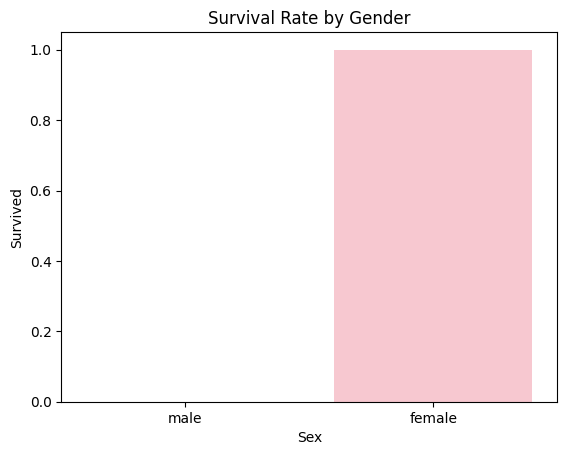

In [27]:
#Visualize

sns.barplot(x='Sex',y='Survived', data=df, color='pink')
plt.title("Survival Rate by Gender")
plt.show()

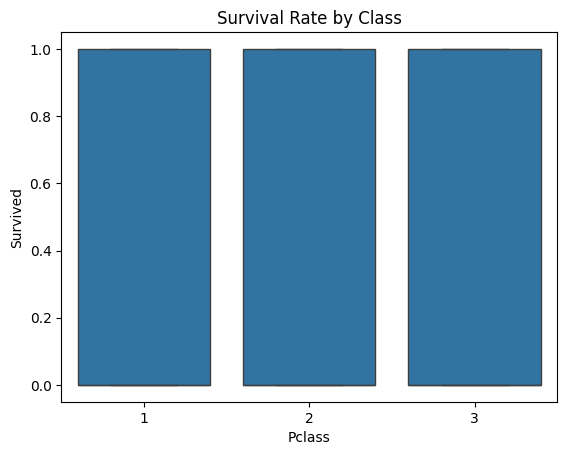

In [28]:
sns.boxplot(x="Pclass", y="Survived", data=df)
plt.title("Survival Rate by Class")
plt.show()

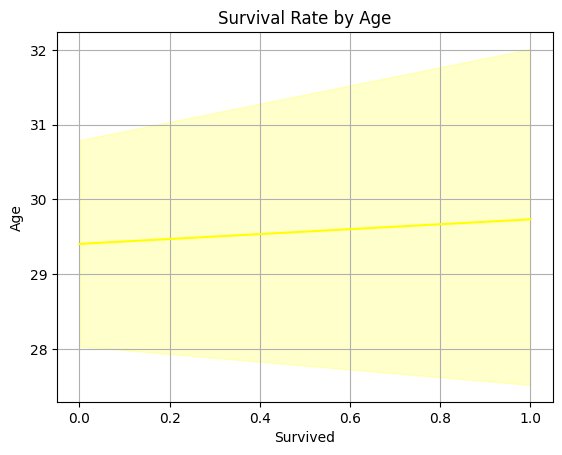

In [29]:
sns.lineplot(x="Survived", y="Age", data=df, color='yellow')
plt.title("Survival Rate by Age")
plt.grid(True)
plt.show()

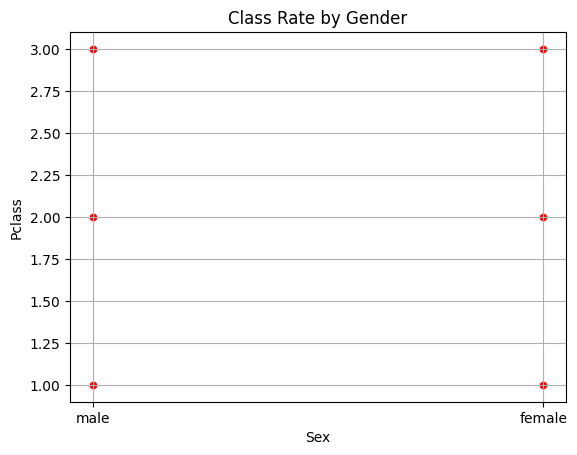

In [30]:
sns.scatterplot(x='Sex',y='Pclass', data=df, color='red')
plt.title("Class Rate by Gender")
plt.grid(True)
plt.show()

In [31]:
#Find Top 5 Oldest Passengers Who Survived

survived_df = df[df['Survived'] == 1]
top_5_oldest = survived_df.sort_values(by='Age', ascending=False).head(5)
top_5_oldest[['Name', 'Age', 'Survived']]

,Name,Age,Survived
96,"Cavendish, Mrs. Tyrell William (Julia Florence...",76.0,1
179,"Compton, Mrs. Alexander Taylor (Mary Eliza Ing...",64.0,1
305,"Crosby, Mrs. Edward Gifford (Catherine Elizabe...",64.0,1
114,"Straus, Mrs. Isidor (Rosalie Ida Blun)",63.0,1
48,"Bucknell, Mrs. William Robert (Emma Eliza Ward)",60.0,1


In [32]:
#Find Survival Rate by Port of Embarkation (Embarked)

survival_rate_by_port = df.groupby('Embarked')['Survived'].mean()
survival_rate_by_port

Embarked
C    0.392157
Q    0.521739
S    0.327138
Name: Survived, dtype: float64

In [33]:
#Create a New Column: FamilySize = SibSp + Parch

df['FamilySize'] = df['SibSp'] + df['Parch']
df[['SibSp', 'Parch', 'FamilySize']].head()

,SibSp,Parch,FamilySize
0,0,0,0
1,1,0,1
2,0,0,0
3,0,0,0
4,1,1,2


# Mini Project Completed!!!!